# Release planning problem with soft constraints

In the [previous blog post]() we have seen how a rpp model can help us when planning releases for a project. But, it turns out that the model can be a little bit to strict when deciding if we should implement a requirement or not.The previous model have assumed that the cost of each requirement is well know and it will not vary during the implementation. In the software engineering world we know that this is not true. Most of the time, we give an approximation of the cost and if we are good enough the approximation is close enough.
In this post, we provide a model that can deal with this problem using fuzzy logic.

## Introduction to fuzzy logic

In  classical logic, there are only two states that are valid: 1 or 0; where the is no room for ambiguity.
In contrast, fuzzy logic has the idea that human perception can be fuzzy. In other words, membership of an object to a set is gradual and not abrupt.

In classical mathematical models, such as the one used in the previous post, restrictions are only a requirement that solutions need to fulfill if they want to be feasible. If the solution is feasible, these restrictions will assign it a value of 1, otherwise it will be 0. Using fuzzy logic we can generalize this concept of feasible solution. The restrictions will now assign a value between 0 and 1, depending on how much the solution fulfill the restriction. The solution that we'll choose is the one that maximizes the membership of a solution to the set of feasible solutions. i.e. the solution that has the highest value of membership.


Suppose that we have a set of requirements that should be implemented and limited resources, such as time. The RPP model will give us a solution where all resources available are used without surpassing a maximum value. In other words, if we have a maximum of 40 man hours to spend; the RPP model will try to use as many of them as possible to maximize the profit. But, we know that these 40 man hours are not always real because someone can do overtime work or someone can fall ill, etc.

Introducing fuzzy logic to the RPP model can provide an approach to solve this problem. In this new model,we  set two values. The first one will be the available "normal" man hours that we have, where the solutions that uses this amounts of hours or less does not present risk or more effort. The second value is the hours that we have in an extreme situation where everyone can do overtime work and nobody fall ill. If the solutions surpass this second value it is no more feasible. 

To illustrate this, we can see the following image

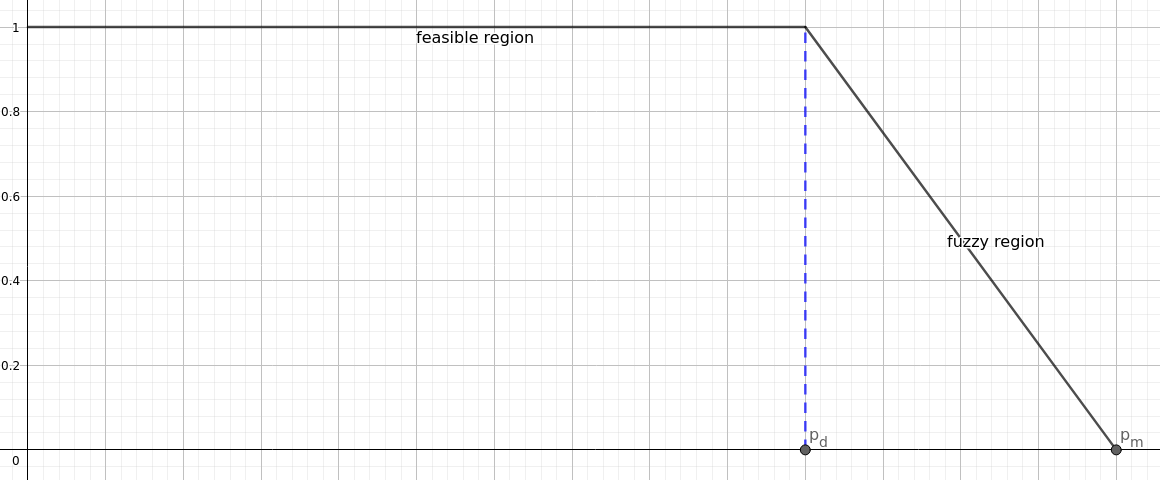

It shows the concept described above. $p_d$ is the value where the solution is still 100% feasible and it does not represent more effort or risk. Above this value until $p_m$ is the region that represents more effort to accomplish. $p_m$ can be thought as the minimum value where we admit no solution.


To introduce fuzzy logic in the RPP model we have to modify the cost constraint:
$$
\sum_{i=1}^{n} e_i \cdot y_{li} \leq p \quad \forall l \in \{1, \dotsc ,k+1 \}
$$

To say this is a soft constraint, we'll use the symbol $\preceq$ which represent the concept  we have said about the fuzzy membership of a solution. So, the constraint changes to:
$$
\sum_{i=1}^{n} e_i \cdot y_{li} \preceq p \quad \forall l \in \{1, \dotsc ,k+1 \}
$$

Now, the question is how to solve this model using tools that we have. Long story short, we can use the Wernes approach, which says that first we have to solve two classical optimization problems of the original model. For a more detailed description check the  [original paper](https://www.researchgate.net/publication/336906292_Modelo_de_Planificacion_de_Lanzamientos_de_Software_utilizando_Restricciones_Blandas) (only in spanish).

To solve this problem, we'll need all the information to solve the classical one and the two values that we have stated in previous paragraphs. These values are
- $p_d$ is the desirable cost. The one that does not present more risk or effort.
- $p_m$ is the maximum admissible cost where a solution is valid. Above this value no solution is valid.


Solving the original RPP model with $p_m$ and $p_d$ as $p$ we'll obtain two values of the objective function. The first one is $f_1$ associated with $p_d$. The second one is $f_0$ associated with $p_m$. These values are going to be parameters in the soft model.

## Formal definition

- Let $k \in \mathbb{N}$  be releases to take into account.
- Let $R = [r_1,r_2,\dotsc,r_n]$ be an array of requierements to be developed and assigned to each *release*
- Let $S = [s_1,s_2,\dotsc,s_m]$ be an array of stakeholders.
- Let $X \in \{1,\dotsc,k+1\}^n$ be an array of integers that represents for each requierement $i$ the number of the release in which it is implemented. If $x_i == k+1$ the requierement $i$ is not implemented
- Let $Y \in \{0,1\}^{k+1 \cdot n}$ be a matrix of binary variables, where $y_{l,i} \in Y / y_{l,i} == 1$ if the requierement $i$ is implemented in release $l$ 
$$
Y = \begin{bmatrix}
y_{1,1} & \cdots & y_{1,n}\\
\vdots & \ddots & \vdots \\
y_{k+1,1} & \cdots & y_{k+1,n} \\
\end{bmatrix}
$$
- Let $E = [e_1,e_2,\dotsc,e_n]$ be an array of efforts associated with each requierement
- Let $p_d$ be the desirable cost of each release and $f_1$ the value of the objetive function associated to solving the model without soft restrictions
- Let $p_m$ be the max affordable cost of each release and $f_0$ the value of the objetive function associated to solving the model without soft restrictions
- Let $B= [b_1,b_2,\dotsc,b_m]$ be an array of profit associated to a stakeholder.
- Let $P$ be the precedence relation between $(i,j)$ where $i,j$ are requirements; meaning that $i$ requirement must be implemented if $j$ requirement is implemented.
- Let $A \in \mathbb{R}^{m\cdot n}$ be the priority matrix, where $a_{s,i} \in A / a_{s,i}$ is the priority of the stakeholder $s$ for a requierement $i$. This matrix must be normalized, i.e. the sum of the elements for each row must be 1

The objetive function (OF) is:
$$
max \ \alpha
$$


subject to:


0) Profit soft constraint: this constraint result from applying the wernes approach.


$$
\sum_{s = 1}^{m} \sum_{i=1}^{n} b_s \cdot  a_{s,i} \cdot (|k+1|-x_i) \geq f_1 + \alpha(f_0 - f_1)
$$


1) Release constraint: $x_i$ must contain the number of release in which the requierement is implemented

$$
x_i = \sum_{l=1}^{k+1} l \cdot y_{li} \quad \forall i \in \{1,\dotsc, n\}
$$


2) Implementation constraint: every requierement should be implemented 

$$
\sum_{l=1}^{k+1} y_{li} = 1 \quad \forall i \in \{1,\dotsc ,n\}
$$

3) Effort soft constaint: This constraint also arises from applying the wernes approach

$$
\sum_{i=1}^{n}  y_{li}\cdot e_i \leq p_m - \alpha(p_m - p_d) \quad \forall l \in \{1, \dotsc ,k+1 \}
$$

4) Precedence constraint: requierement $i$ must be implemented before or in the same release than requierement $j$

$$
x_i \leq x_j \quad \forall (i,j) \in P
$$

## Implementing RPP soft in python
As in the previous blog posts, we are using pyomo to implement this model. The code is almost unchanged from the RPP post, only a few lines were changed. 

Here is the full model:

In [9]:
from __future__ import division
import pyomo.environ as pyo 
import numpy as np

# Helper functions used to normalize rpp.A
def normalize(x):
    """
    Given a numpy vector X, returns another vector the where the sum of elements is 1
    """
    acc = np.sum(x)
    if acc == 0:
        return x
    return x / acc


def A_normalizate(rpp):
    """
    Given an rpp model with A matrix
    Normalize each row, so the sum of elements per row is 1
    """
    A = np.zeros((rpp.number_of_stakeholders.value, rpp.number_of_requirements.value))
       
    # Assing rpp.A values to A
    for (i, j) in rpp.A.index_set():
        A[i - 1, j - 1] = rpp.A[i, j].value

    # Normalize A
    for i in range(0, A.shape[0]):
        A[i, :] = normalize(A[i, :])

    # Assign A values to rpp.A
    for j in range(0, A.shape[1]):
        for i in range(0, A.shape[0]):
            rpp.A[i + 1, j + 1] = A[i, j]

In [12]:
def abstract_model():
    """
    Creates an abstract model of Rpp problem with soft restrictions
    """
    rpp = pyo.AbstractModel()
    rpp.name = "Release planning problem with soft restrictions"

    # Model's parameters
    rpp.number_of_requirements = pyo.Param(within=pyo.NonNegativeIntegers)
    rpp.number_of_stakeholders = pyo.Param(within=pyo.NonNegativeIntegers)
    rpp.number_of_releases = pyo.Param(within=pyo.NonNegativeIntegers)
    rpp.pm = pyo.Param(within=pyo.NonNegativeIntegers)
    rpp.pd = pyo.Param(within=pyo.NonNegativeIntegers)
    rpp.f0 = pyo.Param(within=pyo.Reals)
    rpp.f1 = pyo.Param(within=pyo.Reals)
    
    
    # Sets that will be used to iterate over 
    rpp.requirements = pyo.RangeSet(1, rpp.number_of_requirements)
    rpp.stakeholders = pyo.RangeSet(1, rpp.number_of_stakeholders)
    rpp.releases = pyo.RangeSet(1, rpp.number_of_releases)
    
    # Parameters defined over previous defined sets
    rpp.efforts = pyo.Param(rpp.requirements)
    rpp.profit = pyo.Param(rpp.stakeholders)
    
    # Relations defined over the cartesian product of sets
    # (i,j) requierement i should be implemented if j is implemented
    rpp.precedence = pyo.Set(within=rpp.requirements * rpp.requirements)
    # (s,i) > 0 if stakeholder s has interest over requierement i
    # This relation is here beacuse the dataset have this information
    # We are using this to initialize matrix A
    rpp.interest = pyo.Set(within=rpp.stakeholders * rpp.requirements)

    # We use this function to assign a requierement priority for each stakeholder
    # This is because the dataset we are using does not have this information
    def A_init(rpp, s, i):
        if (s, i) in rpp.interest:
            return 1
        return 0
    # This parameter needs to be mutable so later on we can normalize it
    rpp.A = pyo.Param(rpp.stakeholders, rpp.requirements, initialize=A_init, mutable=True)

    # Variables
    # Used in wernes approach
    rpp.a = pyo.Var(bounds=(0, 1))
    # Store the number in which the requierement is implemented
    rpp.x = pyo.Var(rpp.requirements, domain=pyo.NonNegativeIntegers)
    # y[l,i] == 1 if requierement i is implemented in l release
    rpp.y = pyo.Var(rpp.releases, rpp.requirements, domain=pyo.Binary)
   
    # Objetive function
    def obj_function_rule(rpp):
        return rpp.a
    rpp.OBJ = pyo.Objective(rule=obj_function_rule, sense=pyo.maximize)

    # Constraints
    def profit_soft_constraint_rule(rpp):
        inner_sum = lambda s: sum(rpp.A[s, i] * (rpp.number_of_releases - rpp.x[i]) for i in rpp.requirements)
        return sum(rpp.profit[s] * inner_sum(s) for s in rpp.stakeholders) >= rpp.f1 + rpp.a * (rpp.f0 - rpp.f1)
    rpp.profit_soft_constraint = pyo.Constraint(rule=profit_soft_constraint_rule)
    
    def release_constraint_rule(rpp, i):
        return sum(rpp.y[l, i] * l for l in rpp.releases) == rpp.x[i]
    rpp.release_constraint = pyo.Constraint(rpp.requirements, rule=release_constraint_rule)

    def implementation_constraint_rule(rpp, i):
        return sum(rpp.y[l, i] for l in rpp.releases) == 1
    rpp.implementation_constraint = pyo.Constraint(rpp.requirements, rule=implementation_constraint_rule)

    def effort_soft_constraint_rule(rpp, l):
        return sum(rpp.efforts[i] * rpp.y[l, i] for i in rpp.requirements) <= rpp.pm - rpp.a * (rpp.pm - rpp.pd)
    rpp.efforts_soft_constraint = pyo.Constraint(pyo.RangeSet(1, rpp.number_of_releases - 1), rule=effort_soft_constraint_rule)

    def precende_constraint_rule(rpp, i, j):
        return rpp.x[i] <= rpp.x[j]
    rpp.precedence_constraint = pyo.Constraint(rpp.precedence, rule=precende_constraint_rule)
    
    return rpp

As we did before, we can test our model with the same problem we have been working thorugh these posts. We only have to add the following lines to our `data.dat`

```text
param pm := 50;
param f0 := 188.33333333333331;

param pd := 40;
param f1 := 120.0;
```
Here,`pm` and `pd` are user defined values.  `f1` and `f0` obtained solving the original rpp model.

With these changes, we can solve the model

In [13]:
from time import perf_counter


rpp = abstract_model()
solver_name = 'cbc'
data_file = "./datasets/rpp_data_soft.yaml"
rpp_concrete = rpp.create_instance(data=data_file)
solver = pyo.SolverFactory(solver_name)


A_normalizate(rpp_concrete)

res = solver.solve(rpp_concrete)

res['Solver'][0]['Status']

<SolverStatus.ok: 'ok'>

The solution for the RPP model with $p=50$
```text
x : Size=5, Index=requirements
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      1 :  None :   1.0 :  None : False : False : Integers
      2 :  None :   2.0 :  None : False : False : Integers
      3 :  None :   2.0 :  None : False : False : Integers
      4 :  None :   3.0 :  None : False : False : Integers
      5 :  None :   1.0 :  None : False : False : Integers
```

And for $p=40$
```text
x : Size=5, Index=requirements
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      1 :  None :   1.0 :  None : False : False : Integers
      2 :  None :   2.0 :  None : False : False : Integers
      3 :  None :   3.0 :  None : False : False : Integers
      4 :  None :   3.0 :  None : False : False : Integers
      5 :  None :   2.0 :  None : False : False : Integers
```

If we display the solution of the soft model, we'll see that it's a mix between the previous two solutions; where it's not as greedy as the first one and not as conservative as the second one. 

In [54]:
pyo.display(rpp_concrete.x)

x : Size=5, Index=requirements
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      1 :     0 :  None :  None : False :  True : NonNegativeIntegers
      2 :     0 :  None :  None : False :  True : NonNegativeIntegers
      3 :     0 :  None :  None : False :  True : NonNegativeIntegers
      4 :     0 :  None :  None : False :  True : NonNegativeIntegers
      5 :     0 :  None :  None : False :  True : NonNegativeIntegers


This change can be seen ff we display the cost soft constraint. It'll show that the first release has a body of $-20$. This means that the first release is 20 units below the maximum cost. To check if this is true, we can make the sum of the constraint

In [48]:
pyo.display(rpp_concrete.efforts_soft_constraint)

efforts_soft_constraint : Size=2
    Key : Lower : Body : Upper
      1 :  None :  0.0 :   0.0
      2 :  None :  0.0 :   0.0


In [49]:
# cont_soft_constraint: 
# sum(rpp.efforts[i] * rpp.y[l, i] for i in rpp.requirements) <= rpp.pm - rpp.a * (rpp.pm - rpp.pd)
l = 1# First release
acc = 0.0
for i in rpp_concrete.requirements.data():
    acc += rpp_concrete.efforts[i] * rpp_concrete.y[l,i].value
acc

50.0

In [50]:
pyo.display(rpp_concrete.OBJ)

OBJ : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   True :   0.0


# Conclusion
This model has shown that using fuzzy logic is not as hard as it seems and it can provide a good way of modelling uncertanty. Furthermore, we only have used it in one constraint, but it ca be used in almost every way you can imagine.

In the next posts, we'll see that this comes with a downside. Using fuzzy logic increase the computational resources requiered to solve the problem and using an algorithm may not be the best option; so we'll need another method to find a solution.

In [15]:
pyo.display(rpp_concrete.y)

for i in rpp_concrete.y:
    print(rpp_concrete.y[i].value, end=',')

y : Size=15, Index=y_index
    Key    : Lower : Value : Upper : Fixed : Stale : Domain
    (1, 1) :     0 :   1.0 :     1 : False : False : Binary
    (1, 2) :     0 :   0.0 :     1 : False : False : Binary
    (1, 3) :     0 :   0.0 :     1 : False : False : Binary
    (1, 4) :     0 :   0.0 :     1 : False : False : Binary
    (1, 5) :     0 :   1.0 :     1 : False : False : Binary
    (2, 1) :     0 :   0.0 :     1 : False : False : Binary
    (2, 2) :     0 :   1.0 :     1 : False : False : Binary
    (2, 3) :     0 :   1.0 :     1 : False : False : Binary
    (2, 4) :     0 :   0.0 :     1 : False : False : Binary
    (2, 5) :     0 :   0.0 :     1 : False : False : Binary
    (3, 1) :     0 :   0.0 :     1 : False : False : Binary
    (3, 2) :     0 :   0.0 :     1 : False : False : Binary
    (3, 3) :     0 :   0.0 :     1 : False : False : Binary
    (3, 4) :     0 :   1.0 :     1 : False : False : Binary
    (3, 5) :     0 :   0.0 :     1 : False : False : Binary
1.0,0.0,0.0,0